In [ ]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 90.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 99.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 KB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 KB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 92.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 

In [ ]:
!pip install qiskit-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 KB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 633.5/633.5 KB 60.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docplex: filename=docplex-2.25.236-py3-none-any.whl size=671365 sha256=84d87aaa49c87537f427d1ded082503306d5bf0b4dd76990a22a38d22a61e490
  Stored in directory: /root/.cache/pip/wheels/02/32/20/7f3f85d090da2c3b1ec41de83f17f426a05acc5d9f5e8a1c9f
Successfully built docplex


# The Traveling Salesman Problem (TSP):
The Traveling Salesman Problem (TSP) is a well-known optimization problem in computer science and mathematics. It poses the question of finding the shortest possible route that a salesman can take to visit a set of cities and return to the starting city, while visiting each city only once.

Formally, the TSP can be defined as follows: Given a list of cities and the distances between each pair of cities, the objective is to find the shortest possible Hamiltonian cycle (a cycle that visits each city exactly once) in the graph representing the cities and their distances. The challenge lies in finding the optimal solution among all possible permutations of the cities.

The TSP is considered an NP-hard problem, which means that as the number of cities increases, the computational effort required to find the optimal solution grows exponentially. As a result, finding the exact optimal solution for large TSP instances becomes infeasible with classical computers.

Quantum computing offers a potential avenue to tackle the TSP more efficiently. Quantum algorithms, such as the Quantum Approximate Optimization Algorithm (QAOA) and the Quantum Variational Eignsolver (VQE) algorithm, aim to leverage quantum parallelism and quantum superposition to search for near-optimal solutions in a more efficient manner. However, the practical implementation of quantum algorithms for large-scale TSP instances is still an area of active research and development.

# Draw the Graph for the Traveling Salesman Problem (TSP) to visually represent the cities, distances, connectivity:

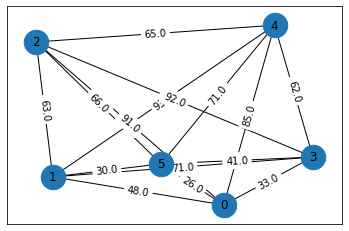

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from qiskit_optimization.applications import Tsp

#Graphs are drawn for the Traveling Salesman Problem (TSP) to visually represent the cities, distances, connectivity.
#A couple of helper functions
def draw_graph(graph):
    pos = [tsp.graph.nodes[node]["pos"] for node in tsp.graph.nodes]
    nx.draw_networkx(graph, node_size=600, pos=pos)
    edge_labels = nx.get_edge_attributes(graph, "weight")
    nx.draw_networkx_edge_labels(graph, pos=pos, edge_labels=edge_labels)

def draw_tsp_solution(G, solution_order):
    pos = [tsp.graph.nodes[node]["pos"] for node in tsp.graph.nodes]
    G2 = nx.DiGraph()
    G2.add_nodes_from(G)
    n = len(solution_order)
    for i in range(n):
        j = (i + 1) % n
        G2.add_edge(solution_order[i], solution_order[j], weight=G[solution_order[i] ][solution_order[j] ]["weight"])
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(
        G2, node_size=600, ax=default_axes, pos=pos
    )
    edge_labels = nx.get_edge_attributes(G2, "weight")
    nx.draw_networkx_edge_labels(G2, pos, edge_labels=edge_labels)

n = 6
tsp = Tsp.create_random_instance(n, seed=123)
adj_matrix = nx.to_numpy_array(tsp.graph)

draw_graph(tsp.graph)

# Solve tsp problem classicaly:

[279.0] (0, 3, 4, 2, 1, 5)


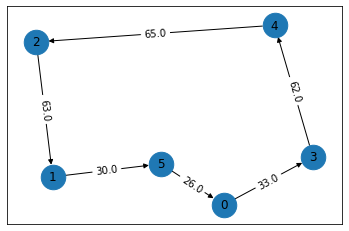

In [ ]:
from itertools import permutations

def classical_tsp(adj_matrix, N):


    w = adj_matrix
    a = list(permutations(range(1,N)))

    solution_distance = 1e10 #distance at begining

    for i in a: #for all permutations
        distance = 0
        pre_j = 0 #starting in city 0
        for j in i: #for each element of a permutation
            distance = distance + w[pre_j][j] #going from one city to another
            pre_j = j #save previous city
        distance = distance + w[pre_j][0] #going back to city 0
        order = (0,) + i #route description (i is permutation, 0 at the begining - the first city)
        #print('Order: ', order, ' Distance: ', distance) #show solutions
        if distance < solution_distance:
            solution_distance= distance
            solution_order = order
    return [ [solution_distance], solution_order]

solution_distance, solution_order = classical_tsp(adj_matrix, n)
print(solution_distance, solution_order)

draw_tsp_solution(tsp.graph, solution_order)

In [ ]:
from qiskit_optimization.applications import Tsp
import networkx as nx

n = 3
tsp = Tsp.create_random_instance(n, seed=123)
adj_matrix = nx.to_numpy_array(tsp.graph)

# Constract the Quadratic Unconstrained Binary Optimization (QUBO) formulation of the Travelling Salesman Problem (TSP):

In [ ]:
from qiskit_optimization.converters import QuadraticProgramToQubo

qp = tsp.to_quadratic_program()
qp2qubo =QuadraticProgramToQubo()
qubo =qp2qubo.convert(qp)
qubitOp, offset = qubo.to_ising()

# Use VQE algorithm to solv ethe tsp problem:



In [ ]:
from qiskit.primitives import Sampler
from qiskit.algorithms.minimum_eigensolvers import SamplingVQE
from qiskit.circuit.library import TwoLocal
from qiskit.algorithms.optimizers import SPSA

# Use VQE algorithm to solv ethe tsp problem
optimizer =SPSA(maxiter=300)
ansatz = TwoLocal(qubitOp.num_qubits, "ry", "cz", reps=5, entanglement="linear")
sampler = Sampler()
vqe =SamplingVQE(sampler, ansatz, optimizer)
result = vqe.compute_minimum_eigenvalue(qubitOp)

energy: -6589.661398013174
time: 21.474454402923584
feasible: True
solution: [2, 0, 1]
202.0 [2, 0, 1]


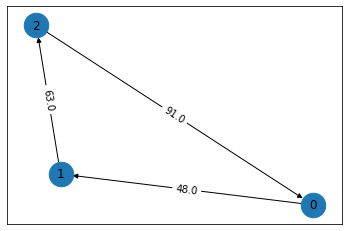

In [ ]:
print("energy:", result.eigenvalue.real)
print("time:", result.optimizer_time)
x = tsp.sample_most_likely(result.eigenstate)
print("feasible:", qubo.is_feasible(x))
solution_order = tsp.interpret(x)
print("solution:", solution_order)
solution_distance = tsp.tsp_value(solution_order, adj_matrix)
print(solution_distance, solution_order)
draw_tsp_solution(tsp.graph, solution_order)